## Stock daily returns
Here we will exlore daily returns of a stock. This metric is often used for correlation between stocks as a metric of similarity in their performance.

#### Library imports

In [103]:
#optional installations: 
#!pip install yfinance --upgrade --no-cache-dir
#!pip3 install pandas_datareader

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# ___library_import_statements___
import pandas as pd

# for pandas_datareader, otherwise it might have issues, sometimes there is some version mismatch
pd.core.common.is_list_like = pd.api.types.is_list_like

# make pandas to print dataframes nicely
pd.set_option('expand_frame_repr', False)  

import pandas_datareader.data as web
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time

#newest yahoo API 
import yfinance as yahoo_finance

#optional 
#yahoo_finance.pdr_override()

# optionally comment to see all warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#### Variable definitions

In [104]:
# define stock tiker to check
ticker = 'TSLA'
# get data n years back
n = 2

# end day is today
end = datetime.datetime.now()
# and from today we can look n years/months back
start = datetime.datetime(end.year - n,end.month,end.day)

In [105]:
# download data from yahoo finance with Pandas datareader
df = web.DataReader(ticker, 'yahoo', start=start, end=end)

In [106]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-20,66.057999,62.374001,65.410004,63.076000,45359500.0,63.076000
2018-12-21,64.694000,62.487999,63.480000,63.953999,40084000.0,63.953999
2018-12-24,62.900002,59.040001,62.700001,59.077999,27799500.0,59.077999
2018-12-26,65.393997,58.818001,60.000000,65.218002,40815500.0,65.218002
2018-12-27,64.433998,60.299999,63.967999,63.226002,42875500.0,63.226002


Let's make quick plot of the stock Adjusted Close price.

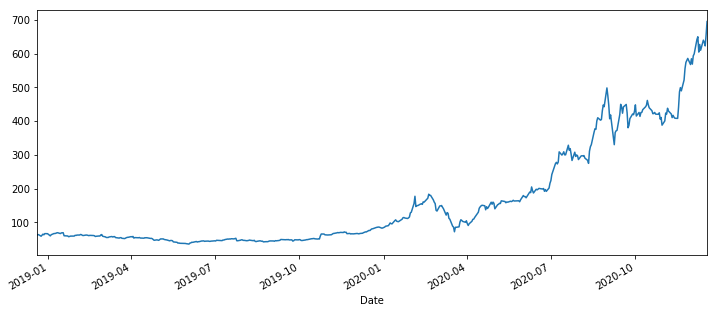

In [107]:
df['Adj Close'].plot(figsize=(12,5))

#### Absolute daily returns
Absolute daily returns are plain difference in price day to day. As such are not good indicator to compare 2 different stocks or even the same stock in the long timeframe.

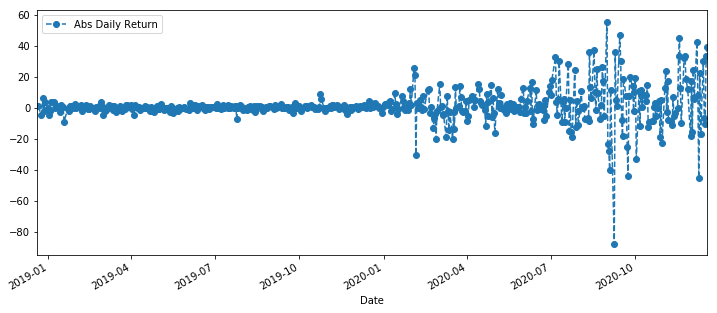

In [108]:
df['Abs Daily Return'] = df['Adj Close'].diff()
df['Abs Daily Return'].plot(figsize=(12,5), legend=True, marker='o', linestyle='--')

#### Percentage daily returns
Percentage daily returns are normalized. They show percentage difference from previous day price. Percentage daily returns are convenient metric to compare performance over long time or as a comparison metric between multiple stocks. 

In [109]:
df['Pct Daily Return'] = df['Adj Close'].pct_change()

In [110]:
df.tail(2)

,High,Low,Open,Close,Volume,Adj Close,Abs Daily Return,Pct Daily Return
Date,,,,,,,,
2020-12-17,658.820007,619.500000,628.190002,655.900024,56270100.0,655.900024,33.130005,0.053198
2020-12-18,695.000000,628.539978,668.900024,695.000000,218741900.0,695.000000,39.099976,0.059613


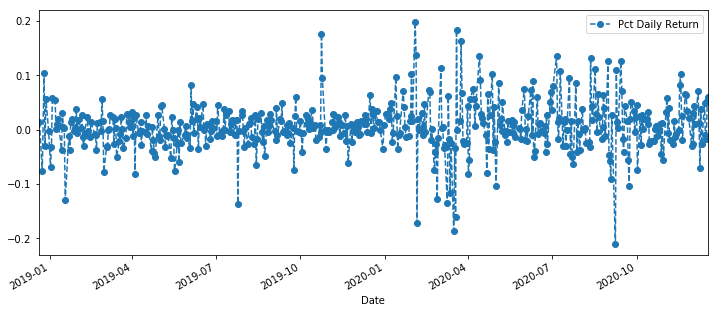

In [111]:
df['Pct Daily Return'].plot(figsize=(12,5), legend=True, marker='o', linestyle='--')

Histogram of percentage daily returns will show the distribution of gains/losses. Typically we are expecting distribution close to Normal distribution. 
Stocks that are most of the time on the uptrend will have the distribution skewed to the right. Analogically downtrending stocks will be skewed to the left.

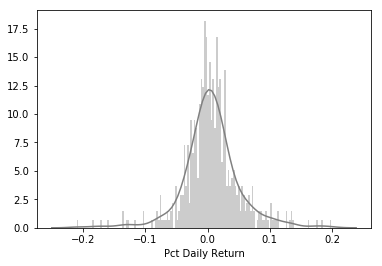

In [112]:
sns.distplot(df['Pct Daily Return'].dropna(), bins=150,color='grey')

In [113]:
# skewness - measures asymmetry of the distribution
df['Pct Daily Return'].skew()

-0.020528902847910847

In [114]:
# kurtosis - measures whether our distribution is flatter 
# (has more datapoints on tails of the distribution) than normal distribution
df['Pct Daily Return'].kurt()

3.892453425424671

#### Source:
- https://sajalsharma.com/portfolio/tech_stock_analysis
- sphinx-dat.readthedocs.io/en/latest/02-01-exploring-distributions.html